#Task 27-> Evaluation Techniques for classification models

#####
Evaluation techniques for classification models help assess their performance and ensure they make accurate predictions. Key techniques include:
Confusion Matrix: A table showing true positives, true negatives, false positives, and false negatives, providing a detailed breakdown of classification results.
Accuracy: The ratio of correctly predicted instances to the total number of instances. It gives a general sense of how often the model is correct.
Precision: The ratio of true positives to the sum of true positives and false positives. It measures the accuracy of positive predictions.
Recall (Sensitivity): The ratio of true positives to the sum of true positives and false negatives. It measures the ability to identify all positive instances.
F1 Score: The harmonic mean of precision and recall. It balances precision and recall, especially useful when dealing with imbalanced datasets.
ROC Curve: A graphical representation of the true positive rate versus the false positive rate at various thresholds. It helps evaluate the trade-offs between true positives and false positives.
AUC (Area Under the Curve): Measures the overall performance of the ROC curve. An AUC of 1 indicates a perfect model, while an AUC of 0.5 indicates a model with no discrimination ability.
Cross-Validation: Splits the dataset into multiple folds to train and test the model on different subsets, providing a more robust estimate of model performance.
Classification Report: A summary of precision, recall, F1 score, and support for each class, offering a
comprehensive view of the model’s performance across different classes.

### import necessary libraries and dataset

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


file_path = r'C:\Users\Huawei\Desktop\Titanic-Dataset.csv'
df = pd.read_csv(file_path)


# Encoding categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
#encoding is done to remove value error of could not convert string to float

# features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
target = 'Survived'

X = df[features]
y = df[target]


### Split Data

In [60]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the Model

In [61]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Make Predictions

In [62]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]#For ROC curve, y_prob will be used

#### Confusion Matrix

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2 1]
 [2 1]]


#### Accuracy

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


#### Precision

In [65]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")


Precision: 0.50


#### Recall

In [66]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")


Recall: 0.33


#### F1 Score

In [67]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")


F1 Score: 0.40


#### ROC Curve and AUC

AUC: 0.56


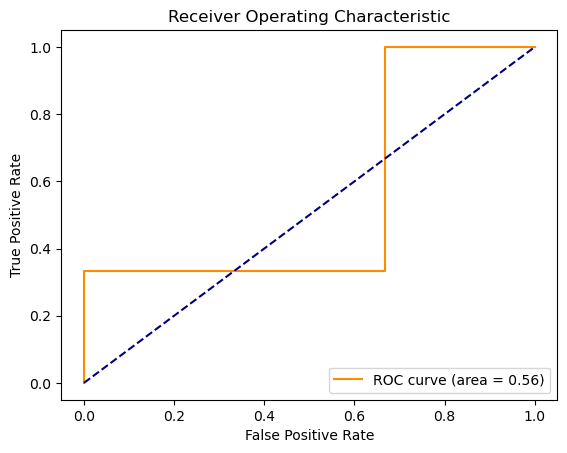

In [68]:
falsepositiverate, truepositiverate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(falsepositiverate, truepositiverate)
print(f"AUC: {roc_auc:.2f}")


plt.figure()
plt.plot(falsepositiverate, truepositiverate, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')#x corordinates are from 0 to 1 and y coordinates are from 0 to 1
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


#### Classification Report

In [69]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



#### Cross-Validation

In [70]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Scores: [1.         0.33333333 0.5        0.83333333 0.6       ]
Mean Cross-Validation Accuracy: 0.65
